In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [3]:

# Initializing a set of 50 cities each from the cities list and other variables lists
city_count = 0
set_no = 1
city_name_list = []
city_lat_list = []
city_lng_list = []
city_maxtemp_list = []
wind_speed_list = []
humidity_list = []
cloudiness_list = []
country_list = []
date_list = []


### Perform API Calls
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it's being processed (with the city number and city name).



In [4]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

print("Beginning Data Retrieval")
print("-------------------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

# Loop through the cities list and for each city, get the current weather
for city in cities:
    try:
        # Get the current weather from the API
        response = requests.get(query_url + city)
        json_data = response.json()
        
        # Get the city name, latitude, longitude, max temp, wind speed, humidity, and country
        city_name = json_data['name']
        city_lat = json_data['coord']['lat']
        city_lng = json_data['coord']['lon']
        city_maxtemp = json_data['main']['temp_max']
        city_windspeed = json_data['wind']['speed']
        city_humidity = json_data['main']['humidity']
        city_cloudiness = json_data['clouds']['all']
        city_country = json_data['sys']['country']
        city_date = json_data['dt']
    
        # Append the city name, latitude, longitude, max temp, wind speed, humidity, and country to their respective lists
        city_name_list.append(city_name)
        city_lat_list.append(city_lat)
        city_lng_list.append(city_lng)
        city_maxtemp_list.append(city_maxtemp)
        wind_speed_list.append(city_windspeed)
        humidity_list.append(city_humidity)
        cloudiness_list.append(city_cloudiness)
        country_list.append(city_country)
        date_list.append(city_date)
    
        # Increment the city count if less than 50 or reset to 0 if greater than 50
        if city_count < 49:
            city_count += 1
        else:
            city_count = 0
            set_no += 1
            
        print(f"Processing record {city_count} of set {set_no} | {city_name}")

    except(KeyError,IndexError):
        print(f"Error processing record {city_count} of set {set_no} | {city_name}")


print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")


Beginning Data Retrieval
-------------------------------------
Processing record 1 of set 1 | Mataura
Processing record 2 of set 1 | Hithadhoo
Processing record 3 of set 1 | Qaanaaq
Error processing record 3 of set 1 | Qaanaaq
Processing record 4 of set 1 | Longyearbyen
Processing record 5 of set 1 | Jamestown
Processing record 6 of set 1 | Saskylakh
Processing record 7 of set 1 | Nikolskoye
Processing record 8 of set 1 | Port Elizabeth
Processing record 9 of set 1 | Mahajanga
Processing record 10 of set 1 | Leningradskiy
Processing record 11 of set 1 | Anadyr
Processing record 12 of set 1 | Thompson
Processing record 13 of set 1 | Ushuaia
Processing record 14 of set 1 | San Cristobal
Processing record 15 of set 1 | Lüderitz
Processing record 16 of set 1 | Port-Gentil
Processing record 17 of set 1 | Broome
Processing record 18 of set 1 | Rutul
Processing record 19 of set 1 | Hobart
Processing record 20 of set 1 | Hermanus
Processing record 21 of set 1 | Salinas
Error processing record 

### Convert Raw Data to DataFrame
- Export the city data into a .csv
- Display the DataFrame

In [25]:
# Create a dataframe from the lists
city_weather_df = pd.DataFrame({'City': city_name_list,'Lat': city_lat_list, 'Lng': city_lng_list,
                             'Maxtemp': city_maxtemp_list,'Humidity': humidity_list, 
                             'Cloudiness': cloudiness_list ,'Wind Speed': wind_speed_list, 
                              'Country': country_list, 'Date': date_list
                                })
city_weather_df

,City,Lat,Lng,Maxtemp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,48.47,77,99,3.76,NZ,1651267803
1,Hithadhoo,-0.6000,73.0833,84.60,73,70,9.01,MV,1651267804
2,Qaanaaq,77.4840,-69.3632,12.04,76,18,1.88,GL,1651267805
3,Longyearbyen,78.2186,15.6401,8.44,61,40,5.75,SJ,1651267806
4,Jamestown,42.0970,-79.2353,59.52,34,0,10.36,US,1651267484
...,...,...,...,...,...,...,...,...,...
562,Tārānagar,28.6709,75.0351,86.68,13,7,8.97,IN,1651268080
563,Usinsk,65.9939,57.5281,23.02,93,100,11.83,RU,1651268080
564,Shirokiy,49.7580,129.5230,42.62,56,100,7.45,RU,1651268081
565,Kuantan,3.8077,103.3260,78.91,88,20,0.00,MY,1651268081


In [26]:
# Save the dataframe to a csv file
city_weather_df.to_csv(output_data_file, index=False)


In [27]:
# Calculate count, mean, standard deviation, min, max, quartiles for each column
city_weather_df.describe()

,Lat,Lng,Maxtemp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.00000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.195304,18.251530,60.90582,69.414462,55.828924,8.223757,1.651268e+09
std,33.226436,90.148331,19.81347,22.419688,38.955406,5.670231,1.058430e+02
min,-54.800000,-175.200000,-2.15000,1.000000,0.000000,0.000000,1.651267e+09
25%,-9.121500,-63.358200,48.40500,58.000000,17.000000,3.860000,1.651268e+09
50%,21.426700,24.666700,63.01000,75.000000,66.000000,7.000000,1.651268e+09
75%,47.238350,97.342050,77.23500,86.000000,98.500000,11.125000,1.651268e+09
max,78.218600,179.316700,95.49000,100.000000,100.000000,28.920000,1.651268e+09


In [39]:
city_weather_df.shape

(567, 9)

100

### Inspect the data and remove the cities where humidity > 100%

In [33]:
#Skip this step if there are no cities that have humidity > 100%

if city_weather_df['Humidity'].max() > 100:
    #print(f"{city_weather_df['City']} has a humidity of {city_weather_df['Humidity']} ")
    city_weather_clean_df = city_weather_df[city_weather_df['Humidity'] < 100]
    city_weather_clean_df['Humidity'].max()
else:
    print(f"The maximum humidity is {city_weather_df['Humidity'].max()}. No cities have humidity > 100%")

The maximum humidity is 100. No cities have humidity > 100%


In [36]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df[city_weather_df['Humidity'] > 100].index

Int64Index([], dtype='int64')

In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# This is because we will be making changes to the clean_city_data DataFrame.
# Passing 'inplace = True' will make the changes to the original city_data DataFrame.

clean_city_data = city_weather_df.drop(city_weather_df[city_weather_df['Humidity'] > 100].index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Maxtemp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,48.47,77,99,3.76,NZ,1651267803
1,Hithadhoo,-0.6000,73.0833,84.60,73,70,9.01,MV,1651267804
2,Qaanaaq,77.4840,-69.3632,12.04,76,18,1.88,GL,1651267805
3,Longyearbyen,78.2186,15.6401,8.44,61,40,5.75,SJ,1651267806
4,Jamestown,42.0970,-79.2353,59.52,34,0,10.36,US,1651267484


 ### Plotting the Data
 - Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
 - Save the plotted figures as .pngs.
 ### Latitude Vs. Temperature plot



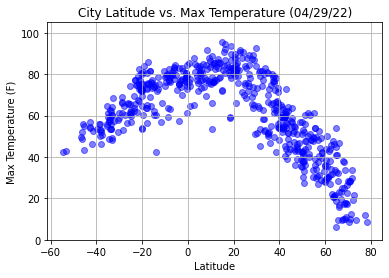

In [53]:
# Latitude vs. Temperature Plot
curr_date = time.strftime("%m/%d/%y")
plt.scatter(clean_city_data['Lat'], clean_city_data['Maxtemp'], color = 'blue', marker='o',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.ylim(0,105)
plt.grid()
plt.show()

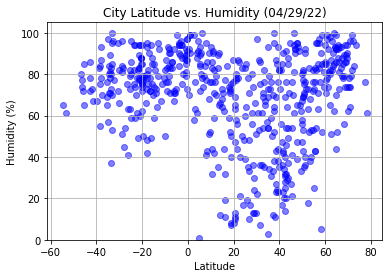

In [54]:
# Latitude vs. Humidity Plot
curr_date = time.strftime("%m/%d/%y")
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color = 'blue', marker='o',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({curr_date})")
plt.ylim(0,105)
plt.grid()
plt.show()

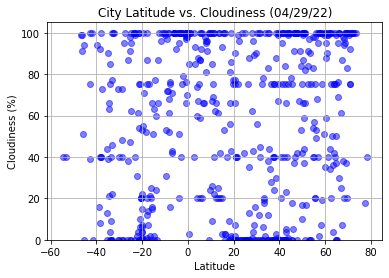

In [55]:
# Latitude vs. Cloudiness Plot
curr_date = time.strftime("%m/%d/%y")
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color = 'blue', marker='o',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({curr_date})")
plt.ylim(0,105)
plt.grid()
plt.show()

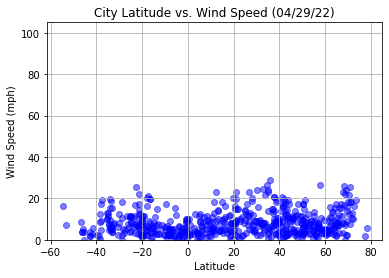

In [56]:
# Latitude vs. Wind Speed Plot
curr_date = time.strftime("%m/%d/%y")
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color = 'blue', marker='o',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({curr_date})")
plt.ylim(0,105)
plt.grid()
plt.show()

In [15]:
# Linear Regression
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

